In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 7)
import warnings
warnings.filterwarnings('ignore')

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [3]:
iris = pd.read_csv('D:\shambhavi\Iris.csv', index_col='Id')
iris.head(6)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
print('Shape of the dataset:',iris.shape)


Shape of the dataset: (150, 5)


In [7]:
iris.Species.unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
iris.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
cat_var = {"Species" : {'Iris-setosa':0,
                        'Iris-versicolor':1,
                        'Iris-virginica':2}}
iris_df = iris.replace(cat_var)

iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [10]:
iris_df.Species.unique()


array([0, 1, 2], dtype=int64)

In [11]:
X= iris_df.drop('Species', axis=1)
y = iris_df['Species']

In [12]:
clf = DecisionTreeClassifier(random_state=51)
model = clf.fit(X, y)


# Print Text Representation

In [13]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



# Visualize Decision Tree with Plot Tree

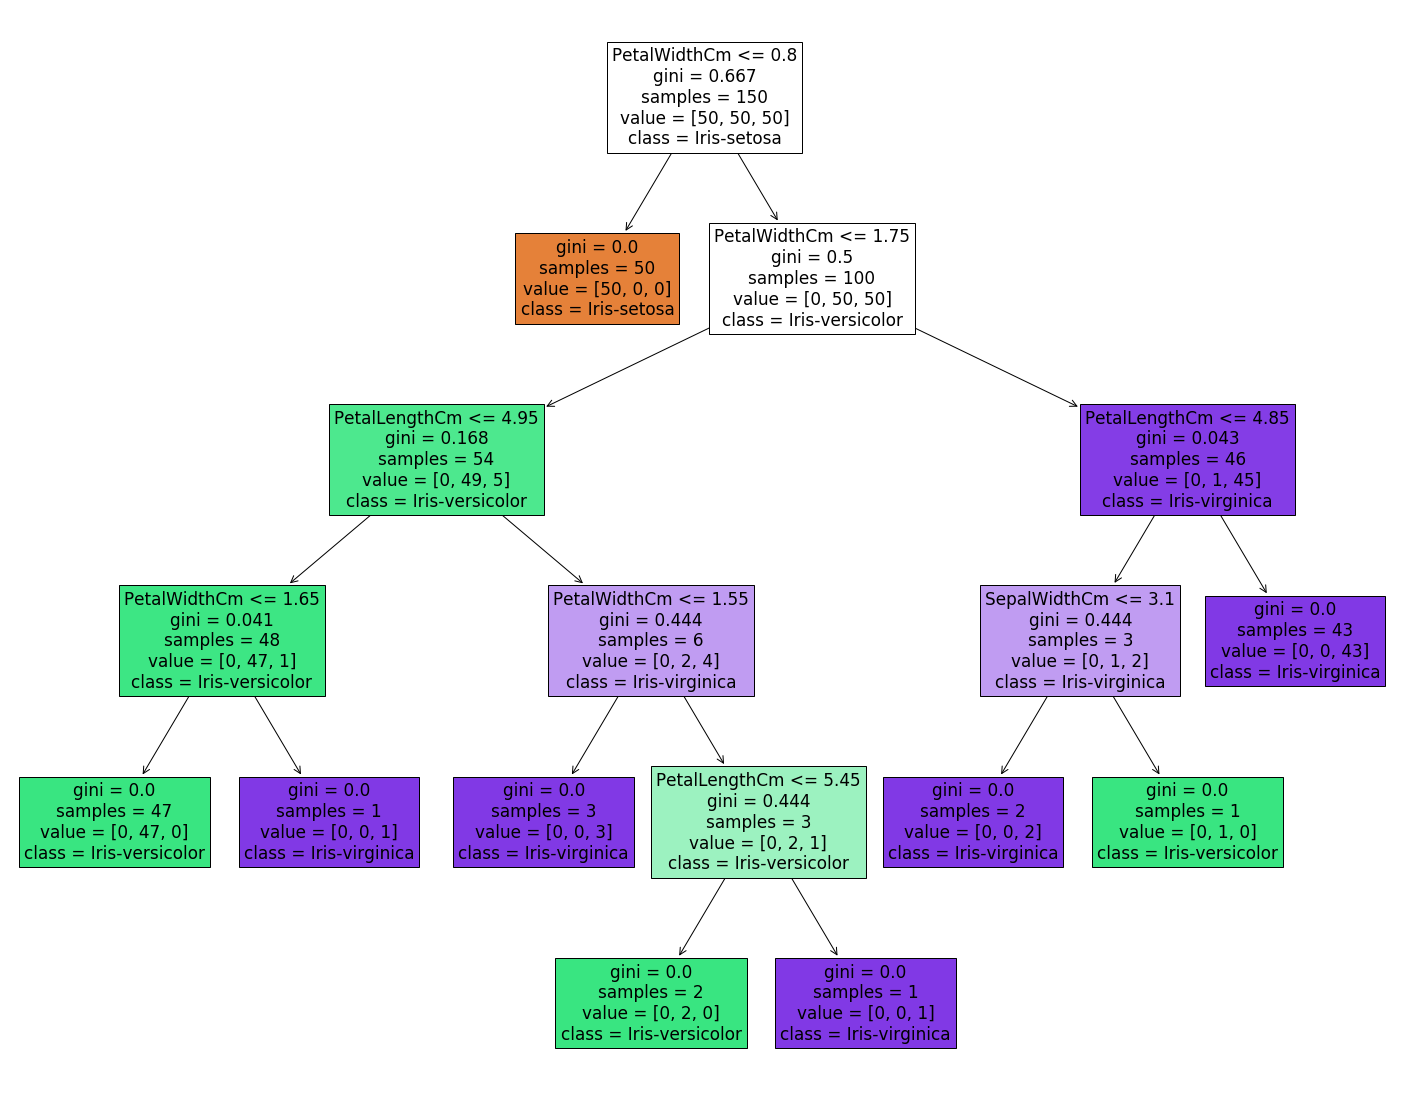

In [14]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=iris.Species.unique(),
                   filled=True)


# Prediction using Decision Tree

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=51)


In [16]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=51, splitter='best')

In [17]:
y_pred= clf.predict(X_test)

#Compare the Actual and the Predicted data

In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
Id,,
79,1,1
122,2,2
100,1,1
37,0,0
93,1,1
108,2,2
132,2,2
145,2,2
11,0,0


# Check the Confusion Matrix and Accuracy Score

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [23]:

cf= confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
score= accuracy_score(y_test, y_pred)

print('Confusion matrix for our model: \n',cf)
print(cr)
print('------------------------------------------------------------')
print('Accuracy score for our model is:',score*100)


Confusion matrix for our model: 
 [[11  0  0]
 [ 0 16  1]
 [ 0  1 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.94      0.94      0.94        17
           2       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

------------------------------------------------------------
Accuracy score for our model is: 95.55555555555556


#Predict the class of samples

# Predict Class of Samples

In [28]:

pred= clf.predict([[2., 2., 2., 2.]]) # 'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2
print('Predicted iris type is:', pred )
print('where: Iris-setosa:0', 'Iris-versicolor:1', 'Iris-virginica:2')

Predicted iris type is: [2]
where: Iris-setosa:0 Iris-versicolor:1 Iris-virginica:2


In [29]:
clf.predict_proba([[2., 2., 2., 2.]])


array([[0., 0., 1.]])